<a href="https://colab.research.google.com/github/Jose-Luis25/EstadisticaVerano/blob/main/Proyecto_Unidad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Jose-Luis25/EstadisticaVerano/refs/heads/main/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df.columns = ["	male","age","education","currentSmoker","cigsPerDay","BPMeds",
"prevalentStroke","prevalentHyp","diabetes","totChol",
"sysBP","diaBP","BMI","heartRate","glucose","TenYearCHD"]
df

,\tmale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("totChol ~ C(currentSmoker)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(currentSmoker),1.0,1.800046e+04,18000.462281,9.070257,0.002614
Residual,4188.0,8.311334e+06,1984.559273,NaN,NaN


valor-p (Shapiro) = 2.1050841161655522e-29


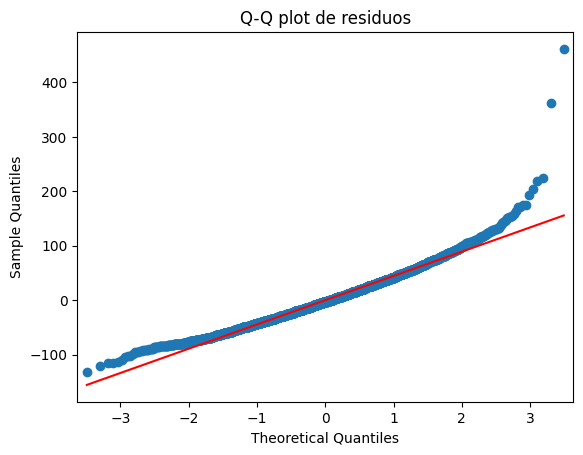

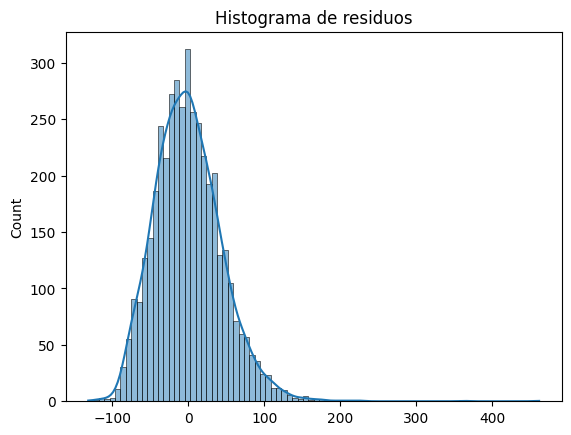

In [6]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [7]:
df["currentSmoker"].unique()

array([0, 1])

In [8]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['currentSmoker'] == 0]['totChol']
grupo2 = df[df['currentSmoker'] == 1]['totChol']



stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: nan


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   	male            4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [10]:
df=df.dropna()
df

,\tmale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   	male            3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -4.5014 0.002 -7.3578 -1.6451   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

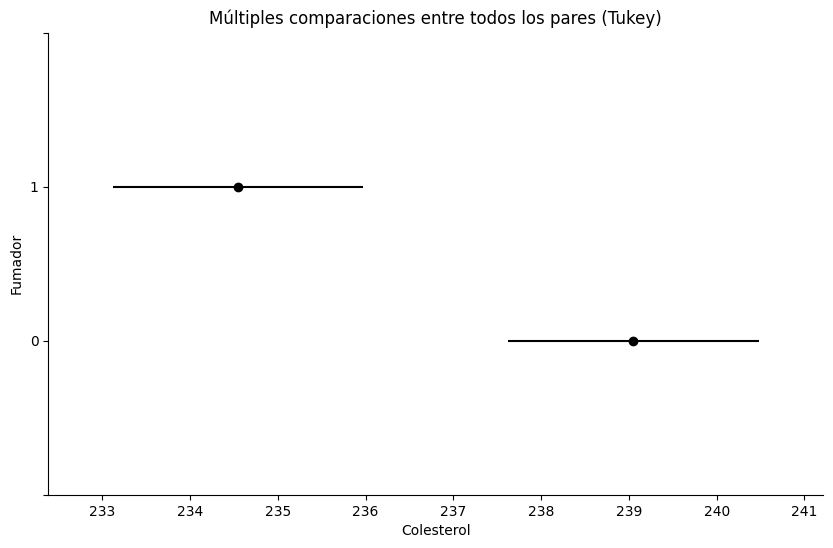

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['totChol'], groups=df['currentSmoker'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Fumador", xlabel="Colesterol")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, '\tmale'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'education'),
  Text(0, 3.5, 'currentSmoker'),
  Text(0, 4.5, 'cigsPerDay'),
  Text(0, 5.5, 'BPMeds'),
  Text(0, 6.5, 'prevalentStroke'),
  Text(0, 7.5, 'prevalentHyp'),
  Text(0, 8.5, 'diabetes'),
  Text(0, 9.5, 'totChol'),
  Text(0, 10.5, 'sysBP'),
  Text(0, 11.5, 'diaBP'),
  Text(0, 12.5, 'BMI'),
  Text(0, 13.5, 'heartRate'),
  Text(0, 14.5, 'glucose'),
  Text(0, 15.5, 'TenYearCHD')])

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


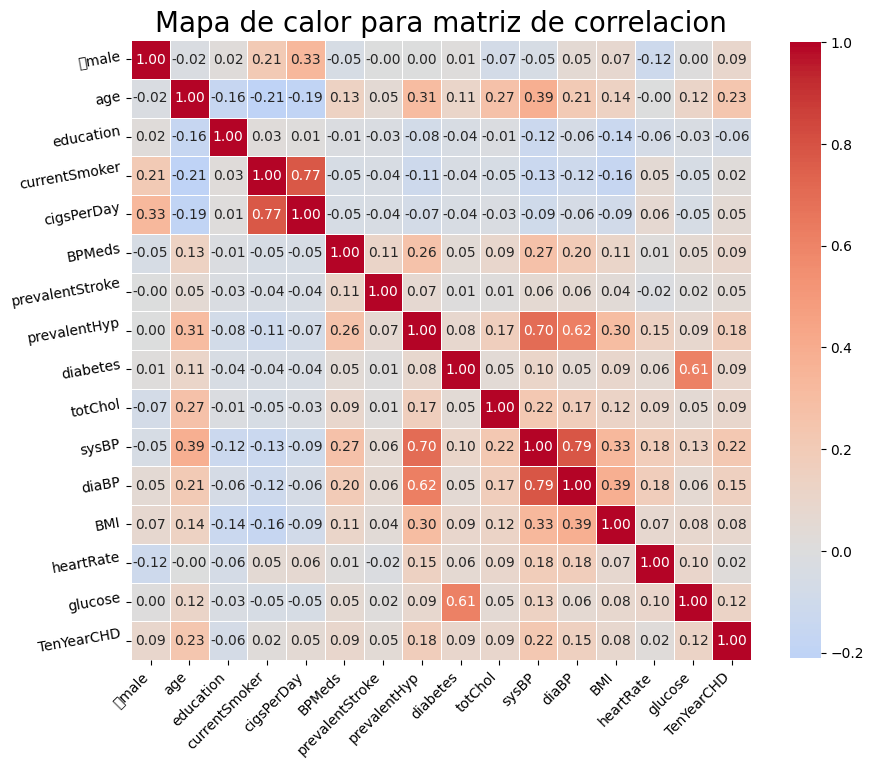

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(
    matriz_de_correlacion,#LO QUE VA A GRAFICAR
    annot=True,#SE MUESTRAN LOS VALORES EN LAS CELDAS
    fmt="0.2f",#0.2f SIGNIFICA "DOS DECIMALES"
    cmap="coolwarm",#PALETA DE COLORES
    square=True,#FORZA CUADRADOS
    linewidths=0.5,#GROSOR DE LINEAS
    cbar_kws={"shrink":0.8},#TAMAÑO BARRA LATERAL
    center=0
)
plt.title("Mapa de calor para matriz de correlacion", fontsize=20),
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=10)


Coeficiente de correlación:  0.2683

Coeficiente de determinación:  0.0720

Intervalo de confianza para b1 de  95%
 1.2207 < b1 <  1.5425

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.1951

para x = 42 y = [226.41399253]
para x = 58, y = [248.51954349]
para x = 100 y = [306.54661474]

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  173.913309  3.803328     166.456455     181.370163     90.279138   

   obs_ci_upper  
0     257.54748  


,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,5.117303e+05,511730.284249,283.480797,2.530389e-61
Residual,3656.0,6.599692e+06,1805.167369,NaN,NaN


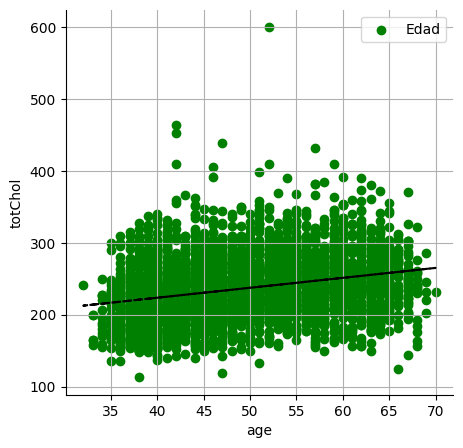

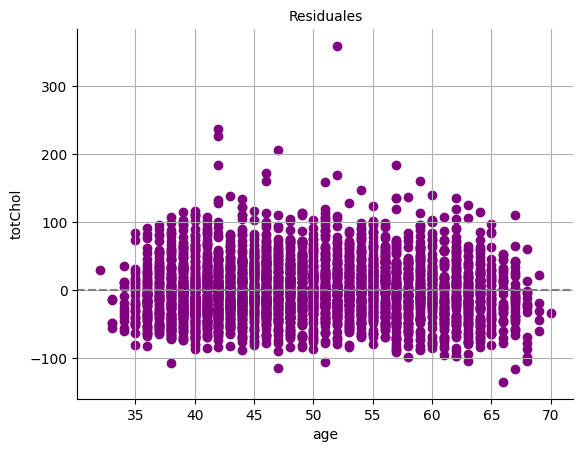

In [14]:
x = df["age"]
y = df["totChol"]


#2 Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(x, y, label = "Edad", color = 'green')
plt.xlabel("age") # nombrar eje x
plt.ylabel("totChol") # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)
plt.legend()#APARECE LO QUE INDICA EL PUNTO
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA

#3¿Los datos soportan la suposición de linealidad?

#SI

#4 Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')



# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.title("Residuales", fontsize = 10)
plt.scatter(x, residuales, color = 'purple')
plt.xlabel("age")
plt.ylabel("totChol")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# 11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno

print(f'para x = 42 y = {modelo.predict([1, 42])}')
print(f'para x = 58, y = {modelo.predict([1, 58])}')
print(f'para x = 100 y = {modelo.predict([1, 100])}\n')
print(modelo.get_prediction([1, 4]).summary_frame(alpha = 0.05))


# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("totChol ~ age", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.0877

Intervalo de confianza para b1 de  95%
 0.9359 < b1 <  1.2821

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0019



,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,5.117303e+05,511730.284249,288.306175,2.682903e-62
sysBP,1.0,1.122339e+05,112233.944272,63.232019,2.428367e-15
Residual,3655.0,6.487458e+06,1774.954298,NaN,NaN


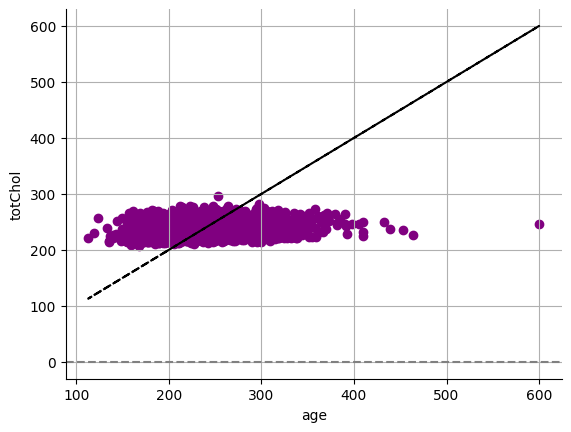

In [15]:
x = df[["age","sysBP"]]
y = df["totChol"]


#2 Realice un diagrama de dispersión para estos datos.
#import matplotlib.pyplot as plt
#plt.figure(figsize = (5, 5), dpi = 100)
#plt.scatter(x, y, label = "tension_arteria", color = 'green')
#plt.xlabel("Session_Duration") # nombrar eje x
#plt.ylabel("Calories_Burned") # nombrar eje y
#plt.gca().spines[["top","right"]].set_visible(False)
#plt.legend()#APARECE LO QUE INDICA EL PUNTO
#plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA

#3¿Los datos soportan la suposición de linealidad?

#SI

#4 Calcule el coeficiente de correlación e interprete el resultado.
#from scipy.stats import pearsonr
#r, _ = pearsonr(x, y)
#print(f'Coeficiente de correlación: {r: 0.4f}\n')



# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'purple')
plt.xlabel("age")
plt.ylabel("totChol")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# 11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno

#print(f'para x1 = 0.5, x2 =3, x3=34 y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50 y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.0, x2 =4, x3=40 y = {modelo.predict([1, 2.0, 4, 40])}\n')
#print(modelo.get_prediction([1, 4]).summary_frame(alpha = 0.05))


# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("totChol ~ age + sysBP", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.0878

Intervalo de confianza para b1 de  95%
 0.9333 < b1 <  1.2800

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0011



,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,5.117303e+05,511730.284249,288.246701,2.762048e-62
sysBP,1.0,1.122339e+05,112233.944272,63.218975,2.444410e-15
prevalentHyp,1.0,4.367628e+02,436.762760,0.246019,6.199220e-01
Residual,3654.0,6.487021e+06,1775.320524,NaN,NaN


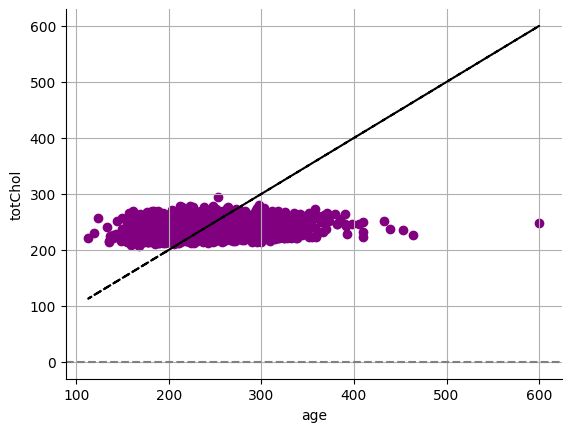

In [18]:
x = df[["age","sysBP","prevalentHyp"]]
y = df["totChol"]


#2 Realice un diagrama de dispersión para estos datos.
#import matplotlib.pyplot as plt
#plt.figure(figsize = (5, 5), dpi = 100)
#plt.scatter(x, y, label = "tension_arteria", color = 'green')
#plt.xlabel("Session_Duration") # nombrar eje x
#plt.ylabel("Calories_Burned") # nombrar eje y
#plt.gca().spines[["top","right"]].set_visible(False)
#plt.legend()#APARECE LO QUE INDICA EL PUNTO
#plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA

#3¿Los datos soportan la suposición de linealidad?

#SI

#4 Calcule el coeficiente de correlación e interprete el resultado.
#from scipy.stats import pearsonr
#r, _ = pearsonr(x, y)
#print(f'Coeficiente de correlación: {r: 0.4f}\n')



# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'purple')
plt.xlabel("age")
plt.ylabel("totChol")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# 11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno

#print(f'para x1 = 0.5, x2 =3, x3=34 y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50 y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.0, x2 =4, x3=40 y = {modelo.predict([1, 2.0, 4, 40])}\n')
#print(modelo.get_prediction([1, 4]).summary_frame(alpha = 0.05))


# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("totChol ~ age + sysBP + prevalentHyp", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova